## preparation

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import torch
import sys
import argparse
import numpy as np
from pathlib import Path
from PIL import Image

In [2]:
sys.path.append('../src')
sys.path.append('../src/Inpaint-Anything')

In [3]:
from inpaint_utils import *

/Users/lyla/Inpaint-Anything/segment_anything/segment_anything/modeling/tiny_vit_sam.py:657: UserWarning: Overwriting tiny_vit_5m_224 in registry with segment_anything.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/Users/lyla/Inpaint-Anything/segment_anything/segment_anything/modeling/tiny_vit_sam.py:657: UserWarning: Overwriting tiny_vit_11m_224 in registry with segment_anything.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/Users/lyla/Inpaint-Anything/segment_anything/segment_anything/modeling/tiny_vit_sam.py:657: UserWarning: Overwriting tiny_vit_21m_224 in registry with segment_anything.modeling.tiny_vit_sam.tiny_vit_21m_224. This is because the name being registered conflicts with an existing name. Pl

Detectron v2 is not installed


## Load Init Image and Masks

In [4]:
file = 'garden_cat'
masks_path = []
masks_path.append('../data/init_mask/' + file + '_layer1_l.npy')
masks_path.append('../data/init_mask/' + file + '_layer2_l.npy')

In [5]:
input_img = '../data/init_image/'+ file + '.jpg'
model = InpaintModel(input_img=input_img, resizeshape=np.load(masks_path[0]).shape)

In [6]:
model.load_masks(masks_path)

## Layer 1

### Mask of Layer 1

#### Original Maks

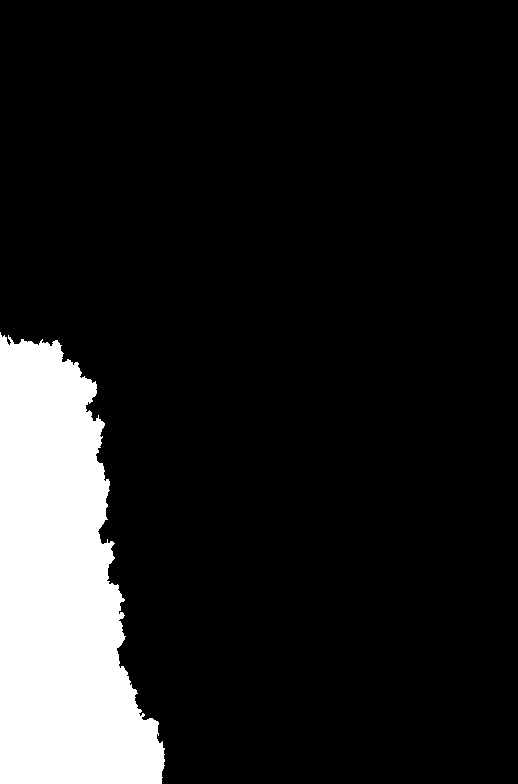

In [7]:
Image.fromarray(model.mask_layers[0])

#### Processed Mask

In [8]:
mask = model.mask_filter_process(n = 1, sigma = 8, threshold = 0.3, filter = 'gaussian', modify = True)

#### The first layer

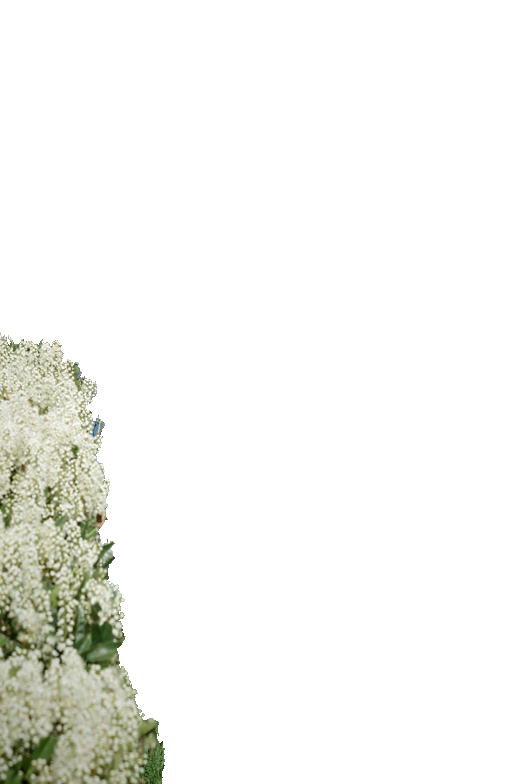

In [9]:
Image.fromarray(model.create_layer(1))

### Inpaint the left part

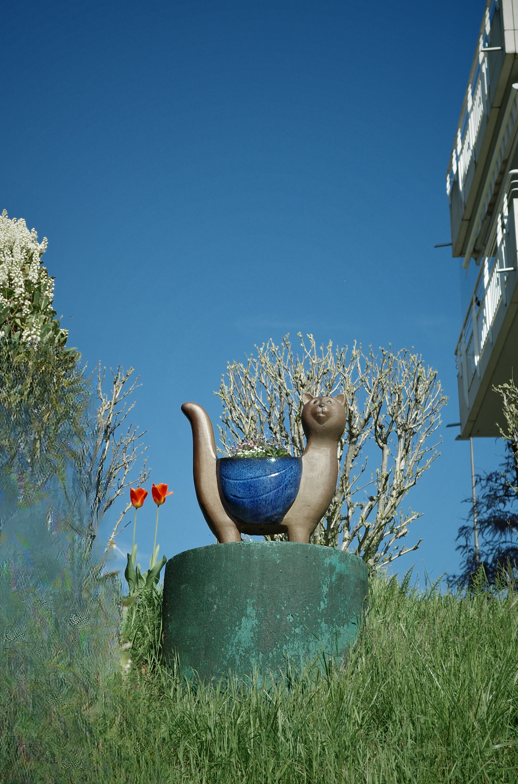

In [10]:
layer_after_mask = model.inpaint_layer(1)
Image.fromarray(layer_after_mask)

## Layer 2

### Mask of Layer 2

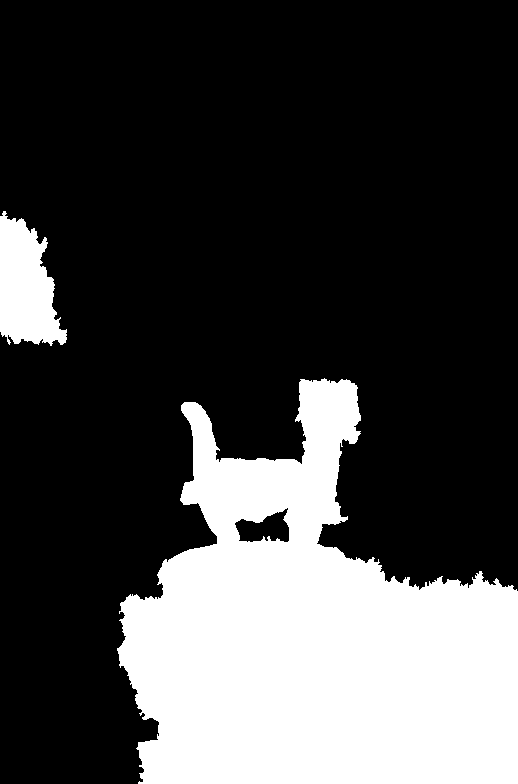

In [11]:
Image.fromarray(model.mask_layers[1])

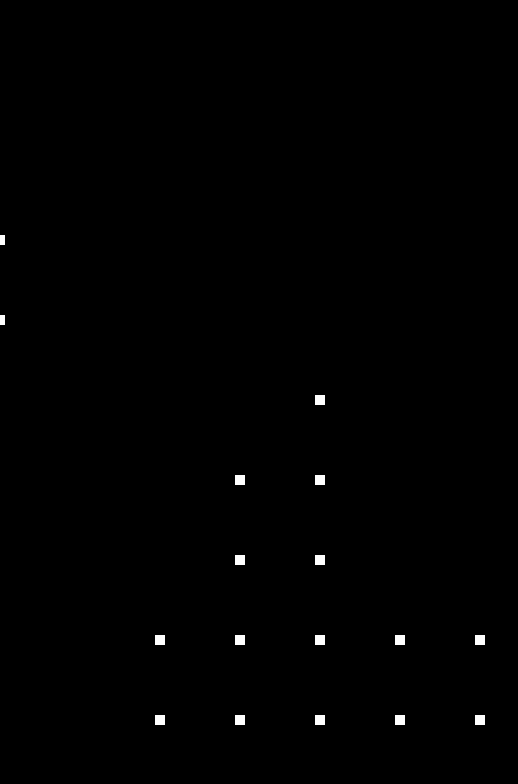

In [12]:
sample, mask = model.mask_re_segmentation(n = 2, sample_method='grid', grid_size=80, modify = False)
Image.fromarray(sample)

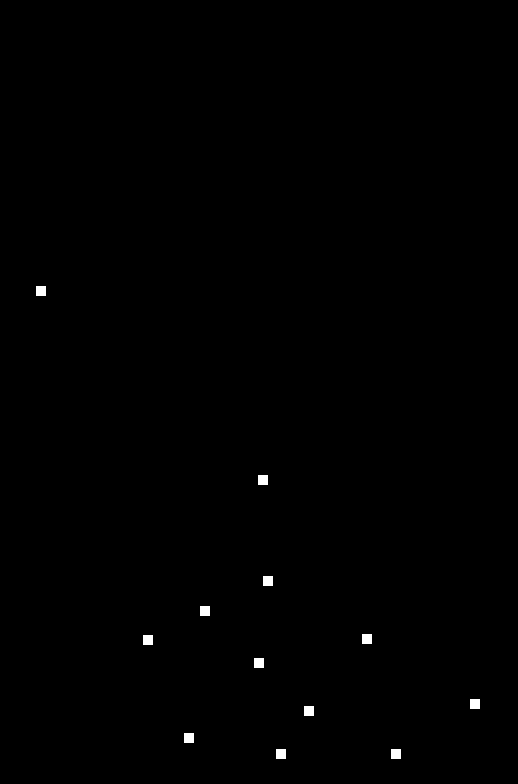

In [13]:
sample, mask = model.mask_re_segmentation(n = 2, sample_method='superpixel',slic_segments = 100, slic_compactness = 10, modify = True)
Image.fromarray(sample)

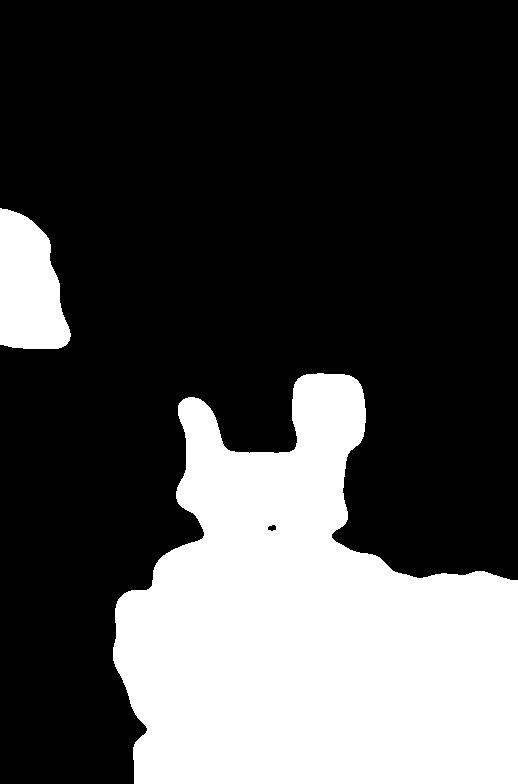

In [14]:
Image.fromarray(model.mask_filter_process(2, 8, 0.2,'gaussian',True))

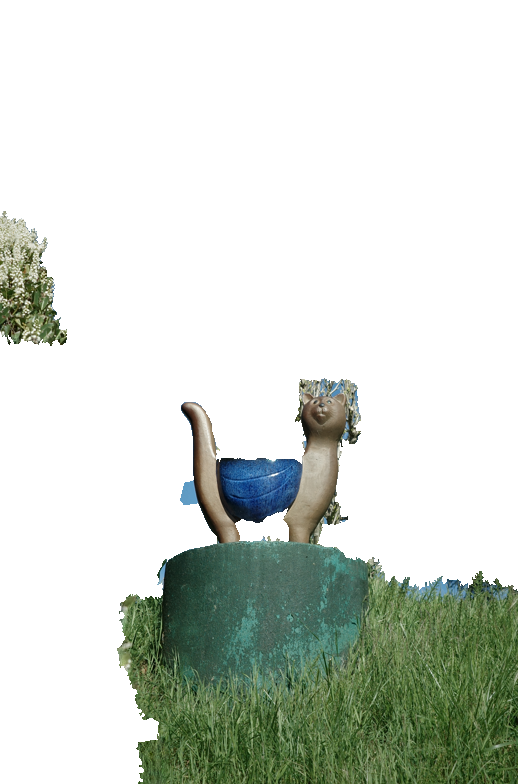

In [15]:
Image.fromarray(model.create_layer(2))

### Inpaint

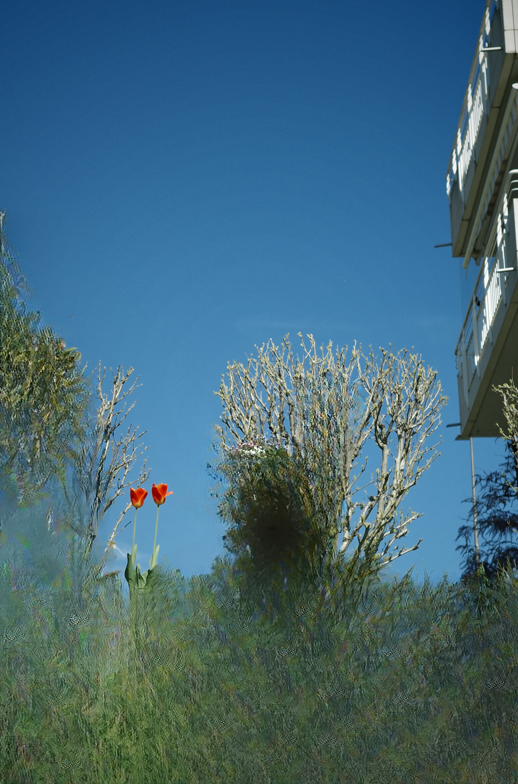

In [16]:
Image.fromarray(model.inpaint_layer(2))